In [4]:
import numpy as np
import pandas as pd
import dltools

In [5]:
train_df = pd.read_csv(
    "./train.tsv.zip",
    sep="\t"
)

In [6]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [7]:
test_df = pd.read_csv(
    "./test.tsv.zip",
    sep="\t"
)

In [8]:
test_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [9]:
train_df.Sentiment.value_counts()

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [11]:
from nltk import word_tokenize
import string

In [12]:
def clean_text(text):
    if pd.isna(text):
        return ''
    text = text.translate(str.maketrans('','',string.punctuation))
    text = text.lower().strip()
    return text

In [13]:
def tokenize_single_text(text):
    """对单个清洗后的文本进行分词"""
    if text == "":  # 处理空文本
        return []
    return word_tokenize(text)

In [14]:
# 1. 先清洗文本列
train_df['Phrase_clean'] = train_df['Phrase'].apply(clean_text)
# 2. 对清洗后的文本列批量分词
train_df['Phrase_tokens'] = train_df['Phrase_clean'].apply(tokenize_single_text)

In [15]:
for idx in range(5):
    print(f"第{idx+1}行原始文本：{train_df.loc[idx, 'Phrase']}")
    print(f"第{idx+1}行分词结果：{train_df.loc[idx, 'Phrase_tokens']}\n")

第1行原始文本：A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
第1行分词结果：['a', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story']

第2行原始文本：A series of escapades demonstrating the adage that what is good for the goose
第2行分词结果：['a', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose']

第3行原始文本：A series
第3行分词结果：['a', 'series']

第4行原始文本：A
第4行分词结果：['a']

第5行原始文本：series
第5行分词结果：['series']



In [16]:
from nltk.corpus import stopwords

In [17]:
stop_words = stopwords.words('english')

In [18]:
train_df

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_clean,Phrase_tokens
0,1,1,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,..."
1,2,1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,..."
2,3,1,A series,2,a series,"[a, series]"
3,4,1,A,2,a,[a]
4,5,1,series,2,series,[series]
...,...,...,...,...,...,...
156055,156056,8544,Hearst 's,2,hearst s,"[hearst, s]"
156056,156057,8544,forced avuncular chortles,1,forced avuncular chortles,"[forced, avuncular, chortles]"
156057,156058,8544,avuncular chortles,3,avuncular chortles,"[avuncular, chortles]"
156058,156059,8544,avuncular,2,avuncular,[avuncular]


In [19]:
def stopwords_tokens(tokens):
    filter_tokens = []
    for token in tokens:
        if token not in stop_words:
            filter_tokens.append(token)
    return filter_tokens

In [20]:
train_df['Phrase_tokens_filtered'] = train_df['Phrase_tokens'].apply(stopwords_tokens)

In [21]:
train_df

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_clean,Phrase_tokens,Phrase_tokens_filtered
0,1,1,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,...","[series, escapades, demonstrating, adage, good..."
1,2,1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,...","[series, escapades, demonstrating, adage, good..."
2,3,1,A series,2,a series,"[a, series]",[series]
3,4,1,A,2,a,[a],[]
4,5,1,series,2,series,[series],[series]
...,...,...,...,...,...,...,...
156055,156056,8544,Hearst 's,2,hearst s,"[hearst, s]",[hearst]
156056,156057,8544,forced avuncular chortles,1,forced avuncular chortles,"[forced, avuncular, chortles]","[forced, avuncular, chortles]"
156057,156058,8544,avuncular chortles,3,avuncular chortles,"[avuncular, chortles]","[avuncular, chortles]"
156058,156059,8544,avuncular,2,avuncular,[avuncular],[avuncular]


In [22]:
train_df.drop(columns=['PhraseId','SentenceId'],inplace=True)

In [23]:
train_df

,Phrase,Sentiment,Phrase_clean,Phrase_tokens,Phrase_tokens_filtered
0,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,...","[series, escapades, demonstrating, adage, good..."
1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,...","[series, escapades, demonstrating, adage, good..."
2,A series,2,a series,"[a, series]",[series]
3,A,2,a,[a],[]
4,series,2,series,[series],[series]
...,...,...,...,...,...
156055,Hearst 's,2,hearst s,"[hearst, s]",[hearst]
156056,forced avuncular chortles,1,forced avuncular chortles,"[forced, avuncular, chortles]","[forced, avuncular, chortles]"
156057,avuncular chortles,3,avuncular chortles,"[avuncular, chortles]","[avuncular, chortles]"
156058,avuncular,2,avuncular,[avuncular],[avuncular]


In [24]:
train_df['text_for_tfidf'] = train_df['Phrase_tokens_filtered'].apply(lambda x: ' '.join(x))

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=2, max_df=0.9)

In [27]:
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['text_for_tfidf'])

In [28]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [29]:
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),  # 稀疏矩阵转密集矩阵
    columns=feature_names,   # 列名为词汇
    index=train_df.index     # 行索引和原数据一致
)


In [30]:
print(f"TF-IDF 矩阵形状：{tfidf_matrix.shape}")  # (样本数, 特征数)
print(f"提取的特征词汇数量：{len(feature_names)}")
print("\n前10个特征词汇：", feature_names[:10])

TF-IDF 矩阵形状：(156060, 5000)
提取的特征词汇数量：5000

前10个特征词汇： ['10' '100' '101' '11' '12' '12yearold' '13' '15' '18' '18yearold']


In [31]:
from gensim.models import Word2Vec

In [32]:
corpus = train_df['Phrase_tokens_filtered'].tolist()

In [33]:
corpus = [tokens for tokens in corpus if len(tokens) > 0]

In [34]:
corpus

[['series',
  'escapades',
  'demonstrating',
  'adage',
  'good',
  'goose',
  'also',
  'good',
  'gander',
  'occasionally',
  'amuses',
  'none',
  'amounts',
  'much',
  'story'],
 ['series', 'escapades', 'demonstrating', 'adage', 'good', 'goose'],
 ['series'],
 ['series'],
 ['escapades', 'demonstrating', 'adage', 'good', 'goose'],
 ['escapades', 'demonstrating', 'adage', 'good', 'goose'],
 ['escapades'],
 ['demonstrating', 'adage', 'good', 'goose'],
 ['demonstrating', 'adage'],
 ['demonstrating'],
 ['adage'],
 ['adage'],
 ['good', 'goose'],
 ['good', 'goose'],
 ['good', 'goose'],
 ['good', 'goose'],
 ['good'],
 ['goose'],
 ['goose'],
 ['goose'],
 ['also',
  'good',
  'gander',
  'occasionally',
  'amuses',
  'none',
  'amounts',
  'much',
  'story'],
 ['also',
  'good',
  'gander',
  'occasionally',
  'amuses',
  'none',
  'amounts',
  'much',
  'story'],
 ['also'],
 ['also'],
 ['good',
  'gander',
  'occasionally',
  'amuses',
  'none',
  'amounts',
  'much',
  'story'],
 ['gand

In [35]:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=2, epochs=30, sg=1, negative=10)

In [36]:
def text_to_w2v(tokens, model, vector_size=100):
    vectors = []
    for token in tokens:
        if token in model.wv.key_to_index:
            vectors.append(model.wv[token])
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

In [37]:
train_df['w2v_vector'] = train_df['Phrase_tokens_filtered'].apply(lambda x: text_to_w2v(x, model, vector_size=100))

In [38]:
train_df

,Phrase,Sentiment,Phrase_clean,Phrase_tokens,Phrase_tokens_filtered,text_for_tfidf,w2v_vector
0,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,...","[series, escapades, demonstrating, adage, good...",series escapades demonstrating adage good goos...,"[-0.1593809, 0.9599459, 0.027396087, -0.236572..."
1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...,"[a, series, of, escapades, demonstrating, the,...","[series, escapades, demonstrating, adage, good...",series escapades demonstrating adage good goose,"[-0.17769732, 0.82495433, 0.0263345, -0.195483..."
2,A series,2,a series,"[a, series]",[series],series,"[0.339936, 1.0765172, 0.4592378, -0.46652865, ..."
3,A,2,a,[a],[],,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,series,2,series,[series],[series],series,"[0.339936, 1.0765172, 0.4592378, -0.46652865, ..."
...,...,...,...,...,...,...,...
156055,Hearst 's,2,hearst s,"[hearst, s]",[hearst],hearst,"[-1.0009106, 0.33172548, -0.31557328, -0.51392..."
156056,forced avuncular chortles,1,forced avuncular chortles,"[forced, avuncular, chortles]","[forced, avuncular, chortles]",forced avuncular chortles,"[-0.35959935, 0.45045027, 0.17121845, -0.04427..."
156057,avuncular chortles,3,avuncular chortles,"[avuncular, chortles]","[avuncular, chortles]",avuncular chortles,"[-0.36042303, 0.33283544, -0.05402951, -0.1490..."
156058,avuncular,2,avuncular,[avuncular],[avuncular],avuncular,"[-0.40617082, 0.318405, -0.031372342, -0.10236..."


## LSTM 模型构建


In [44]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

TensorFlow 版本: 2.10.0
GPU 可用: []


### 1. 数据准备 —— 文本序列化

LSTM 直接处理词序列，因此用 Keras `Tokenizer` 将文本转换为整数索引，再进行 Padding 对齐长度。

In [45]:
# ── 超参数配置 ─────────────────────────────────────────────
MAX_WORDS   = 20000   # 词典大小（保留最高频的 N 个词）
MAX_LEN     = 50      # 序列最大长度（影评短语通常不超过 50 词）
EMBED_DIM   = 128     # Embedding 向量维度
LSTM_UNITS  = 128     # LSTM 隐层单元数
DROPOUT     = 0.3     # Dropout 比例
BATCH_SIZE  = 256
EPOCHS      = 15
NUM_CLASSES = 5       # 情感类别数：0(neg) ~ 4(pos)

In [46]:
# ── 文本序列化 ─────────────────────────────────────────────
texts  = train_df['Phrase_clean'].fillna('').values
labels = train_df['Sentiment'].values   # 原始标签 0~4

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
X_seq = pad_sequences(sequences, maxlen=MAX_LEN,
                      padding='post', truncating='post')

print(f'词表实际大小   : {len(tokenizer.word_index)}')
print(f'输入矩阵形状   : {X_seq.shape}')
print(f'标签分布:\n{pd.Series(labels).value_counts().sort_index()}')

词表实际大小   : 16404
输入矩阵形状   : (156060, 50)
标签分布:
0     7072
1    27273
2    79582
3    32927
4     9206
Name: count, dtype: int64


In [47]:
# ── 划分训练 / 验证集 ─────────────────────────────────────
y_cat = to_categorical(labels, num_classes=NUM_CLASSES)

X_tr, X_val, y_tr, y_val = train_test_split(
    X_seq, y_cat,
    test_size=0.2,
    random_state=42,
    stratify=labels        # 保持各类比例
)
print(f'训练集 shape: {X_tr.shape}')
print(f'验证集 shape: {X_val.shape}')

训练集 shape: (124848, 50)
验证集 shape: (31212, 50)


### 2. 构建双向 LSTM 模型

结构：`Embedding → BiLSTM(128) → BiLSTM(64) → Dense(64, ReLU) → Dropout → Dense(5, Softmax)`

In [48]:
def build_bilstm(vocab_size, embed_dim, lstm_units, max_len,
                 num_classes, dropout):
    """
    双向 LSTM 情感分类模型
    - 两层堆叠 BiLSTM，第一层 return_sequences=True
    - 全连接头 + Softmax 输出 5 个类别概率
    """
    model = Sequential([
        # 1. Embedding 层：将词索引映射为稠密向量
        Embedding(input_dim=vocab_size,
                  output_dim=embed_dim,
                  input_length=max_len,
                  name='embedding'),

        # 2. 第一层 BiLSTM（返回全序列供第二层使用）
        Bidirectional(
            LSTM(lstm_units,
                 return_sequences=True,
                 dropout=dropout,
                 recurrent_dropout=0.1),
            name='bilstm_1'
        ),

        # 3. 第二层 BiLSTM（输出最终隐状态）
        Bidirectional(
            LSTM(lstm_units // 2,
                 dropout=dropout,
                 recurrent_dropout=0.1),
            name='bilstm_2'
        ),

        # 4. 全连接分类头
        Dense(64, activation='relu', name='fc'),
        Dropout(dropout),
        Dense(num_classes, activation='softmax', name='output')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


model = build_bilstm(
    vocab_size  = MAX_WORDS + 1,   # +1 为 OOV token 留位
    embed_dim   = EMBED_DIM,
    lstm_units  = LSTM_UNITS,
    max_len     = MAX_LEN,
    num_classes = NUM_CLASSES,
    dropout     = DROPOUT
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           2560128   
                                                                 
 bilstm_1 (Bidirectional)    (None, 50, 256)           263168    
                                                                 
 bilstm_2 (Bidirectional)    (None, 128)               164352    
                                                                 
 fc (Dense)                  (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 output (Dense)              (None, 5)                 325       
                                                                 
Total params: 2,996,229
Trainable params: 2,996,229
Non-

### 3. 模型训练

- **EarlyStopping**：监控验证集 Accuracy，连续 3 轮无提升则停止并恢复最佳权重  
- **ReduceLROnPlateau**：验证集 Loss 连续 2 轮无下降则学习率减半

In [49]:
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=3,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-5,
        verbose=1
    )
]

history = model.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/15
217/488 [============>.................] - ETA: 22:21 - loss: 1.1913 - accuracy: 0.5294


KeyboardInterrupt



### 4. 训练曲线可视化

### 5. 模型评估

In [51]:
# ── 整体指标 ──────────────────────────────────────────────
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f'验证集 Loss    : {val_loss:.4f}')
print(f'验证集 Accuracy: {val_acc:.4f}\n')

# ── 各类别分类报告 ────────────────────────────────────────
y_pred_prob = model.predict(X_val, batch_size=512, verbose=0)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_val, axis=1)

sentiment_labels = ['0-Negative', '1-Somewhat Neg', '2-Neutral',
                    '3-Somewhat Pos', '4-Positive']

print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=sentiment_labels))

验证集 Loss    : 1.0502
验证集 Accuracy: 0.5834

Classification Report:
                precision    recall  f1-score   support

    0-Negative       0.25      0.00      0.00      1414
1-Somewhat Neg       0.38      0.40      0.39      5455
     2-Neutral       0.66      0.86      0.75     15917
3-Somewhat Pos       0.49      0.30      0.38      6585
    4-Positive       0.49      0.22      0.30      1841

      accuracy                           0.58     31212
     macro avg       0.45      0.36      0.36     31212
  weighted avg       0.55      0.58      0.55     31212



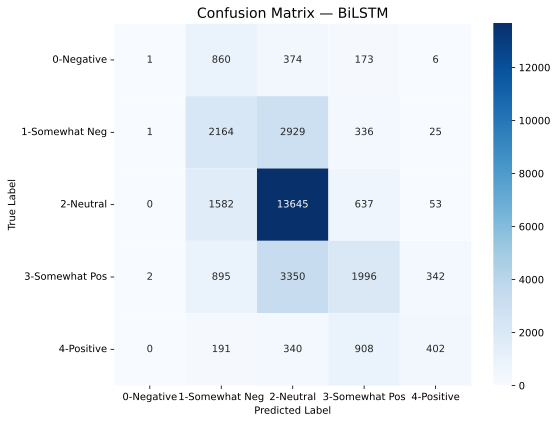

In [54]:
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sentiment_labels,
            yticklabels=sentiment_labels)
plt.title('Confusion Matrix — BiLSTM', fontsize=14)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('lstm_confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()


### 6. 推理示例 —— 预测新文本情感

In [52]:
import string

def predict_sentiment(texts_input, model, tokenizer, max_len=MAX_LEN):
    """
    对任意文本列表进行情感预测。
    返回 DataFrame，含文本、预测标签和置信度。
    """
    # 与训练时一致的清洗
    cleaned = [
        t.translate(str.maketrans('', '', string.punctuation)).lower().strip()
        for t in texts_input
    ]
    seqs   = tokenizer.texts_to_sequences(cleaned)
    padded = pad_sequences(seqs, maxlen=max_len,
                           padding='post', truncating='post')
    probs  = model.predict(padded, verbose=0)
    preds  = np.argmax(probs, axis=1)

    label_map = {0: 'Negative', 1: 'Somewhat Neg', 2: 'Neutral',
                 3: 'Somewhat Pos', 4: 'Positive'}

    return pd.DataFrame([
        {
            'text'      : text,
            'sentiment' : label_map[preds[i]],
            'label'     : int(preds[i]),
            'confidence': round(float(probs[i, preds[i]]), 4)
        }
        for i, text in enumerate(texts_input)
    ])


# ── 示例推理 ──────────────────────────────────────────────
demo_texts = [
    'This movie is absolutely fantastic and deeply touching',
    'Terrible film, complete waste of time',
    'It was okay, nothing special',
    'A masterpiece of storytelling and raw emotion',
    'Boring and utterly predictable plot'
]

result_df = predict_sentiment(demo_texts, model, tokenizer)
print(result_df.to_string(index=False))

                                                  text    sentiment  label  confidence
This movie is absolutely fantastic and deeply touching     Positive      4      0.5613
                 Terrible film, complete waste of time Somewhat Pos      3      0.3558
                          It was okay, nothing special      Neutral      2      0.4135
         A masterpiece of storytelling and raw emotion Somewhat Pos      3      0.4007
                   Boring and utterly predictable plot Somewhat Neg      1      0.3436


### 7. 保存模型与 Tokenizer

In [53]:
import pickle

# 保存模型（Keras 原生格式）
model.save('bilstm_sentiment_model.keras')
print('模型已保存至 bilstm_sentiment_model.keras')

# 保存 Tokenizer（推理时需要与训练时完全一致）
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
print('Tokenizer 已保存至 tokenizer.pkl')


模型已保存至 bilstm_sentiment_model.keras
Tokenizer 已保存至 tokenizer.pkl


In [ ]:
#加载
# loaded_model = tf.keras.models.load_model('bilstm_sentiment_model.keras')
# with open('tokenizer.pkl', 'rb') as f:
#     loaded_tokenizer = pickle.load(f)